<a href="https://colab.research.google.com/github/justin95214/logistics_colab_code/blob/main/(MFC)ABC_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!git clone https://github.com/justin95214/logistic
#%cd /content/logistic

Cloning into 'logistic'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 215 (delta 97), reused 132 (delta 83), pack-reused 57
Receiving objects: 100% (215/215), 1.61 MiB | 15.86 MiB/s, done.
Resolving deltas: 100% (116/116), done.
/content/logistic


In [ ]:
import numpy as np
import pandas as pd
import io
import itertools
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
myfile = files.upload()

Saving 재고_DATA.xlsx to 재고_DATA.xlsx


In [ ]:
class ABC_analysis:
  def __init__(self, url, string_type, myfile):
    self.url = url
    self.string_type = string_type
    self.myfile = myfile
  
  def load_data(self): 
    df = pd.DataFrame()

    if self.string_type == "stock":
      try: 
        df = pd.read_excel(io.BytesIO(self.myfile[self.url]))
      except:
        df = pd.read_excel('/content/logistic/재고_DATA.xlsx')


    if self.string_type == "release":
      try: 
        df = pd.read_excel(io.BytesIO(self.myfile[self.url]))
      except:
        df = pd.read_excel('/content/logistic/출고_DATA.xlsx')


    if self.string_type == "order":
      try: 
        df = pd.read_excel(io.BytesIO(self.myfile[self.url]))
      except:
        df = pd.read_excel('/content/logistic/주문_DATA.xlsx')


    return df


  def sum_and_sort_data(self, df):
    if self.string_type == "stock":
      #내림차순
      df = df.sort_values(by='일평균 재고수량',ascending=False)
      #'일평균 재고수량'의 합계
      Total = df['일평균 재고수량'].sum()
      df['비율'] = df['일평균 재고수량']/Total

    if self.string_type == "release":
      #내림차순
      df = df.sort_values(by='평균 출고금액',ascending=False)
      Total = df['평균 출고금액'].sum()
      df['비율'] = df['평균 출고금액']/Total

    if self.string_type == "order":
      #내림차순
      df = df.sort_values(by='월평균 주문',ascending=False)
      #'일평균 재고수량'의 합계
      Total = df['월평균 주문'].sum()
      df['비율'] = df['월평균 주문']/Total
    return df


  def cal_total_rate(self, df):

    df['누계비율'] = list(itertools.accumulate(df['비율']))
    df['누계비율(%)'] = df['누계비율'] * 100.0
    df = df.round(2)

    return df
  
  def func(self, ar) : 
      if ar < 80 : 
          return "A"
      elif ar >= 90: 
          return "C"
      else:
          return "B"

  def cal_ABC(self, df):
    if self.string_type == "stock":
      df['stock level'] = df['누계비율(%)'].apply(self.func)

    if self.string_type == "release":
      df['release level'] = df['누계비율(%)'].apply(self.func)

    if self.string_type == "order":
      df['order level'] = df['누계비율(%)'].apply(self.func)
    return df

  def pivot_data(self, df):

    if self.string_type == "stock":
      df_pivot = pd.pivot_table(df, columns = ['stock level'], values = ['코드'],aggfunc =['count'])

    if self.string_type == "release":
      df = df.groupby(['release level'])[['release level']].count()
      df_pivot = df.transpose()

    if self.string_type == "order":
      df = df.groupby(['order level'])[['order level']].count()
      df_pivot = df.transpose()

    return df_pivot

  def join_data(self, stock_df, release_df):
    if self.string_type == "release":
      df_join = stock_df.join(release_df.set_index('코드')['release level'], on='코드')

    if self.string_type == "order":
      df_join = stock_df.join(release_df.set_index('코드')['order level'], on='코드')
    return df_join

    df_ABC통합1=df_ABC통합.join(d.set_index('코드')['order level'], on='코드')

  def wanted_data(self, df):
    df = df.loc[:,['코드', '단위','stock level', 'release level']]
    return df

  def final_pivot_data(self, df):
    if self.string_type == "release":
      df_1 = pd.pivot_table(df, index = ['stock level'], columns = ['release level'], values = ['코드'],aggfunc =['count'])
      df_1_p = df_1.rename(columns={'코드':'code'})

      df_1_p = df_1_p.reset_index()

    if self.string_type == "order":
      df_1 = pd.pivot_table(df, index = ['stock level'], columns = ['release level','order level'], values = ['코드'],aggfunc =['count'])
      df_1_p = df_1.fillna(0)

      df_1_p=df_1_p.rename(columns={'코드':'code'})
      df_1_p = df_1_p.astype('int').reset_index()
    return df_1_p


In [ ]:
#from ABC_analysis import ABC_analysis

### 재고 수량 ABC 분석

In [ ]:
url ='일평균 재고수량 등급_raw.xlsx'
string_type = "stock"

Stock_ABC = ABC_analysis(url, string_type, myfile)

df = Stock_ABC.load_data()
df = Stock_ABC.sum_and_sort_data(df)


In [ ]:
df = Stock_ABC.cal_total_rate(df)
df = Stock_ABC.cal_ABC(df)

In [ ]:
df_pivot = Stock_ABC.pivot_data(df)

In [ ]:
df_pivot

count        
stock level     A   B   C
코드             16  13  71

### 출고 수량 ABC 분석

In [ ]:
myfile1 = files.upload()

Saving 출고_DATA.xlsx to 출고_DATA.xlsx


In [ ]:
url1 ='출고_DATA.xlsx'
string_type = "release"

Release_ABC = ABC_analysis(url1, string_type, myfile1)
df1 = Release_ABC.load_data()

df1 = Release_ABC.sum_and_sort_data(df1)

In [ ]:
df1 = Release_ABC.cal_total_rate(df1)
df1 = Release_ABC.cal_ABC(df1)

In [ ]:
df1_pivot = Release_ABC.pivot_data(df1)

In [ ]:
df1_pivot

release level,A,B,C
release level,16,21,63


### 재고 출고 데이터 합치기

In [ ]:
df_join = Release_ABC.join_data(df, df1)
df_total_want = Release_ABC.wanted_data(df_join)
df_total = Release_ABC.final_pivot_data(df_total_want)

In [ ]:
df_total

stock level count        
                           code        
release level                 A   B   C
0                       A     6   1   9
1                       B     1   5   7
2                       C     9  15  47

### 그래프 그리기

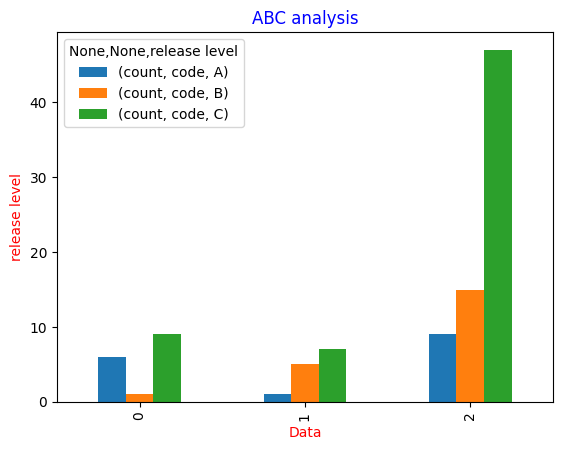

In [ ]:
df_시각화 = df_total.plot(kind='bar')
plt.title("ABC analysis",color='b')
plt.xlabel("Data",color='r')
plt.ylabel("release level",color='r')
plt.rcParams["figure.figsize"] = (8,6)
plt.rc('font', size=20)
plt.show()

### 주문 ABC 분석

In [ ]:
myfile2 = files.upload()

Saving 주문_DATA.xlsx to 주문_DATA.xlsx


In [ ]:
url2 ='주문_DATA.xlsx'
string_type = "order"

Order_ABC = ABC_analysis(url2, string_type, myfile2)
df2 = Order_ABC.load_data()

df2 = Order_ABC.sum_and_sort_data(df2)

In [ ]:
df2 = Order_ABC.cal_total_rate(df2)
df2 = Order_ABC.cal_ABC(df2)

In [ ]:
final_df = Order_ABC.join_data(df_total_want, df2)
final_df1 =final_df 
final_df = Order_ABC.final_pivot_data(final_df)

In [ ]:
final_df1

,코드,단위,stock level,release level,order level
32,P04065-14E,kit,A,A,A
49,P04425-14A,kit,A,C,A
26,P04458-14E,kit,A,A,A
60,P07729-14A,kit,A,A,C
13,P04886-14E,kit,A,C,A
...,...,...,...,...,...
94,P05945-04A,kit,C,A,B
78,P04360-04A,kit,C,B,C
45,P04391-04A,kit,C,A,C
73,P04382-040,kit,C,C,A


In [ ]:
#drive.mount('/content/drive')
final_df.to_excel('abc분석_수찬.xlsx')
final_df1.to_excel('abc분석_raw.xlsx')